In [1]:
#NEW ATTEMPT Below 

In [9]:
# Load data
import pandas as pd
df = pd.read_csv('../Data/mar_labelled.csv')

In [11]:
import spacy
from spacy import tokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer

# Load the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load spacy object
nlp = spacy.load('en_core_web_sm')

# Preprocess the tweets
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub("amber","", temp)
    temp = re.sub("amp","", temp)
    temp = re.sub("heard","", temp)
    temp = re.sub("johnny","", temp)
    temp = re.sub("depp","", temp)
    temp = re.sub("ah","", temp)
    temp = re.sub("jd","", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp

def tokenize(tweet):
    doc = nlp(tweet)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

df['cleaned_text'] = df['full_text'].apply(clean_tweet)
df['tokens'] = df['cleaned_text'].apply(tokenize)

# Add a new column to the DataFrame with the sentiment score for each tweet
df['sentiment_score'] = df['full_text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])


In [4]:
df.head()

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified,Johnny Depp sentiment,Amber Heard sentiment,cleaned_text,tokens,sentiment_score
0,1501160198202961920,2022-03-08 11:37:36+00:00,@la77465262 Just because she is a woman should...,en,1.501159e+18,1.363631e+18,"[{'indices': [92, 110], 'text': 'AmberHeardIsA...",NaN,[],[],...,https://pbs.twimg.com/profile_banners/14875450...,http://pbs.twimg.com/profile_images/1519042268...,4731,NaN,False,not mentioned,not mentioned,just because she is a woman should she not be...,"[ , woman, held, accountable, actions, ]",0.0000
1,1501157581112418313,2022-03-08 11:27:12+00:00,We aren’t just talking a violent phase over a ...,en,1.501157e+18,1.410871e+18,"[{'indices': [206, 227], 'text': 'JusticeforJo...",NaN,[],[],...,https://pbs.twimg.com/profile_banners/14108706...,http://pbs.twimg.com/profile_images/1502943790...,3984,NaN,False,not mentioned,not mentioned,we aren t just talking a violent phase over a ...,"[talking, violent, phase, days, , went, years...",-0.2023
2,1501156722399973378,2022-03-08 11:23:47+00:00,"After claiming he would, he had medical record...",en,1.501156e+18,1.410871e+18,"[{'indices': [203, 224], 'text': 'JusticeforJo...",NaN,[],[],...,https://pbs.twimg.com/profile_banners/14108706...,http://pbs.twimg.com/profile_images/1502943790...,3984,NaN,False,not mentioned,not mentioned,after claiming he would he had medical record...,"[claiming, , medical, records, , cctv, foota...",-0.4215
3,1501156257751007232,2022-03-08 11:21:56+00:00,Judge pls see THIS . \n#JusticeForJohnnyDeppVi...,en,NaN,NaN,"[{'indices': [22, 55], 'text': 'JusticeForJohn...",NaN,[],[],...,https://pbs.twimg.com/profile_banners/31697382...,http://pbs.twimg.com/profile_images/1517454667...,10094,NaN,False,not mentioned,negative,judge pls see this has physically and...,"[judge, pls, , physically, mentally, ...",-0.5319
4,1501156224481517568,2022-03-08 11:21:48+00:00,So @wbpictures @warnerbros DOESN'T want us to...,en,NaN,NaN,"[{'indices': [136, 154], 'text': 'AmberHeardIs...",NaN,[],[],...,https://pbs.twimg.com/profile_banners/13580682...,http://pbs.twimg.com/profile_images/1486479429...,13386,NaN,False,not mentioned,not mentioned,so doesnt want us to share those together ...,"[ , want, share, , hmm, , duty, share, ...",0.4902


Number of Johnny Depp positive tweets: 1135
Number of Johnny Depp negative tweets: 1828
Number of Amber Heard positive tweets: 2781
Number of Amber Heard negative tweets: 4633

Percentage of Johnny Depp positive tweets: 5.91 %
Percentage of Johnny Depp negative tweets: 9.51 %
Percentage of Amber Heard positive tweets: 14.48 %
Percentage of Amber Heard negative tweets: 24.12 %


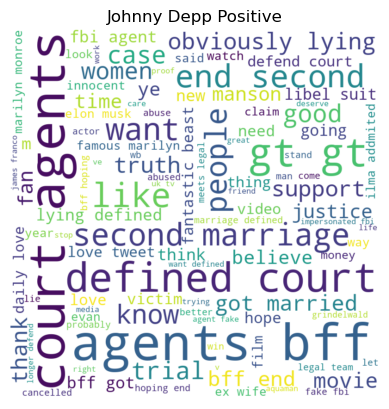

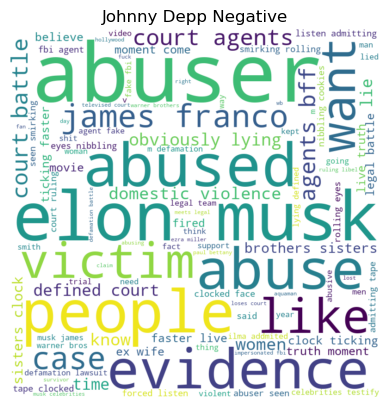

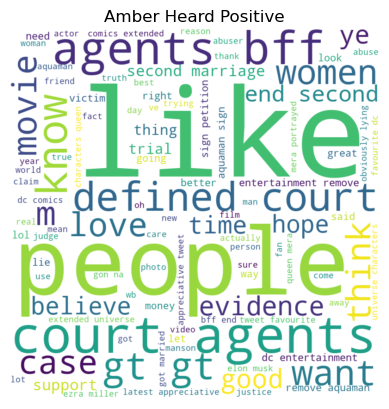

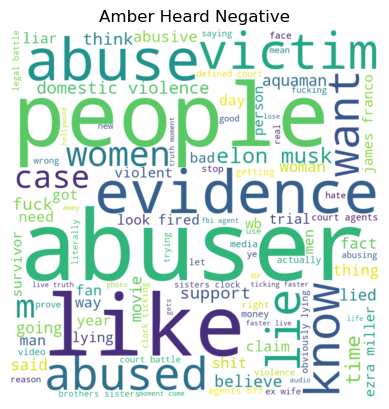

In [12]:
# Create three new DataFrames from the original DataFrame, one for each sentiment category (positive, negative, neutral)
df_jd_pos = df[(df['sentiment_score'] > 0) & (df['Johnny Depp sentiment'] == 'positive')]
df_jd_neg = df[(df['sentiment_score'] < 0) & (df['Johnny Depp sentiment'] == 'negative')]
# df_jd_neu = df[(df['sentiment_score'] == 0) & (df['Johnny Depp sentiment'] == 'neutral')]
df_ah_pos = df[(df['sentiment_score'] > 0) & (df['Amber Heard sentiment'] == 'positive')]
df_ah_neg = df[(df['sentiment_score'] < 0) & (df['Amber Heard sentiment'] == 'negative')]
# df_ah_neu = df[(df['sentiment_score'] == 0) & (df['Amber Heard sentiment'] == 'neutral')]

# Print the number of tweets in each category
print("Number of Johnny Depp positive tweets:", len(df_jd_pos))
print("Number of Johnny Depp negative tweets:", len(df_jd_neg))
# print("Number of Johnny Depp neutral tweets:", len(df_jd_neu))
print("Number of Amber Heard positive tweets:", len(df_ah_pos))
print("Number of Amber Heard negative tweets:", len(df_ah_neg))
# print("Number of Amber Heard neutral tweets:", len(df_ah_neu))

print("")

# Print the number of percentage of tweets in each category
print("Percentage of Johnny Depp positive tweets:", round((len(df_jd_pos)/len(df))*100,2), "%")
print("Percentage of Johnny Depp negative tweets:", round((len(df_jd_neg)/len(df))*100,2),"%")
# print("Number of Johnny Depp neutral tweets:", round((len(df_jd_neu)/len(df))*100,2),"%")
print("Percentage of Amber Heard positive tweets:", round((len(df_ah_pos)/len(df))*100,2),"%")
print("Percentage of Amber Heard negative tweets:", round((len(df_ah_neg)/len(df))*100,2),"%")
# print("Number of Amber Heard neutral tweets:", round((len(df_ah_neu)/len(df))*100,2),"%")

# Generate word clouds for each sentiment category
stopwords_2= set(["n","t","nt","s"])
wordcloud_jd_pos = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_pos['tokens'].sum()))
plt.imshow(wordcloud_jd_pos, interpolation='bilinear')
plt.title("Johnny Depp Positive")
plt.axis("off")
plt.show()

wordcloud_jd_neg = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_neg['tokens'].sum()))
plt.imshow(wordcloud_jd_neg, interpolation='bilinear')
plt.title("Johnny Depp Negative")
plt.axis("off")
plt.show()

# wordcloud_jd_neu = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_neu['tokens'].sum()))
# plt.imshow(wordcloud_jd_neu, interpolation='bilinear')
# plt.title("Johnny Depp Neutral")
# plt.axis("off")
# plt.show()

wordcloud_ah_pos = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_pos['tokens'].sum()))
plt.imshow(wordcloud_ah_pos, interpolation='bilinear')
plt.title("Amber Heard Positive")
plt.axis("off")
plt.show()

wordcloud_ah_neg = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_neg['tokens'].sum()))
plt.imshow(wordcloud_ah_neg, interpolation='bilinear')
plt.title("Amber Heard Negative")
plt.axis("off")
plt.show()

# wordcloud_ah_neu = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_neu['tokens'].sum()))
# plt.imshow(wordcloud_ah_neu, interpolation='bilinear')
# plt.title("Amber Heard Neutral")
# plt.axis("off")
# plt.show()